## Intro

In this notebook, I utilize my own implementation of the Gaussian Naive Bayes classifier and compare it to the performance of the implementation in sklearn. I will only test the performance on one dataset, Diabetes.csv. The purpose of this dataset is to predict whether or not someone has diabetes given 8 different medical attributes (all numeric) about them. My implementation only predicts classes, it does not compute probabilities for each instance. This is a feature that will be implemented in future iterations. I discuss more about improvements at the bottom of this notebook.

## Set up the data and the models

In [1]:
# Import my implementation
from myGaussianNB import myGaussianNB

In [2]:
# Bring in the opposition
from sklearn.naive_bayes import GaussianNB

In [3]:
# Create the necessary objects

myGNB = myGaussianNB() # mine

gnb = GaussianNB() #sklearn 

In [4]:
# Read in the data
from pandas import read_csv
df = read_csv("Diabetes.csv")
print df.head()

   NumberPregnant  GlucoseConcentration  BloodPressure  SkinThickness  \
0               6                   148             72             35   
1               1                    85             66             29   
2               8                   183             64              0   
3               1                    89             66             23   
4               0                   137             40             35   

   Insulin   BMI  DPFunction  Age  Class  
0        0  33.6       0.627   50      1  
1        0  26.6       0.351   31      0  
2        0  23.3       0.672   32      1  
3       94  28.1       0.167   21      0  
4      168  43.1       2.288   33      1  


Data is already clean and numeric. No cleaning or processing necessary which is obviously a huge simplifying assumption for my implementation.

In [5]:
# Set up the data for training and testing
from sklearn.cross_validation import train_test_split

target = "Class"

train, test = train_test_split(df, test_size = 0.1)
X_train = train.ix[:, train.columns != target]
X_test = test.ix[:,test.columns != target]
Y_train = train[target]
Y_test = test[target]

In [6]:
# Fit each model to the data
myGNB.fit(train,"Class")
gnb.fit(X_train, Y_train)

GaussianNB()

In [7]:
my_preds = myGNB.predict(X_test)
preds = gnb.predict(X_test)

## Comparison

In [8]:
# Check confusion matrices

from sklearn.metrics import confusion_matrix

print "My performance: "
print confusion_matrix(Y_test, my_preds)
print 
print "Sklearn performance: "
print confusion_matrix(Y_test, preds)

My performance: 
[[40  7]
 [12 18]]

Sklearn performance: 
[[40  7]
 [12 18]]


Interestingly enough, they output the same confusion matrix, meaning they most likely classified each instance the same. So, that means they should have the same precision, recall, and accuracy scores as well.

In [9]:
# Compare overall accuracy, precision, and recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print "My Accuracy: %.4f " % accuracy_score(Y_test, my_preds)
print "Sklearn Accuracy: %.4f " % accuracy_score(Y_test, preds)
print "My Precision: %.4f" % recall_score(Y_test, my_preds)
print "Sklearn Precision: %.4f" % recall_score(Y_test, preds)
print "My Recall: %.4f" % precision_score(Y_test, my_preds)
print "Sklearn Recall: %.4f" % precision_score(Y_test, preds)

My Accuracy: 0.7532 
Sklearn Accuracy: 0.7532 
My Precision: 0.6000
Sklearn Precision: 0.6000
My Recall: 0.7200
Sklearn Recall: 0.7200


Maybe this is a function of the one train/test split. Maybe, if we try it more times, they will yield different performances for different train/test splits. I'll try running some simulations to see who ultimately gets the better accuracy.

In [10]:
# Run 1000 simulations to see who is better in the long run
# Syntax: 1 if I win, 0 if Sklearn wins

winner = [0] * 1000
for i in range(1000):
    train, test = train_test_split(df, test_size = 0.1)
    X_train = train.ix[:, train.columns != target]
    X_test = test.ix[:,test.columns != target]
    Y_train = train[target]
    Y_test = test[target]
    myGNB.fit(train,"Class")
    gnb.fit(X_train, Y_train)
    my_preds = myGNB.predict(X_test)
    preds = gnb.predict(X_test)
    my_accuracy = accuracy_score(Y_test, my_preds)
    sk_accuracy = accuracy_score(Y_test, preds)
    if my_accuracy > sk_accuracy:
        winner[i] = 1
    elif my_accuracy < sk_accuracy:
        winner[i] = -1
    else: 
        winner[i] = 0

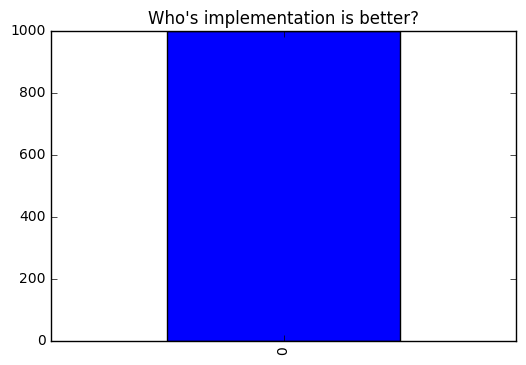

In [12]:
import matplotlib.pyplot as plt
from pandas import Series
winner = Series(winner)
vals = winner.value_counts()
vals.plot(kind = "bar")
plt.title("Who's implementation is better?")
plt.show()

Literally all 1000 had the same exacy accuracy. This means either I did something wrong in the code somewhere or my algorithm just classifies each instance the same because it is basically the same algorithm. I am pretty skeptical about my algorithm producing the exact same results, but I am just going to accept it for now because I completed my goal of implementing Naive Bayes Classification.

## Summary

This was definitely a valuable learning experience to try to write a classification algorithm from scratch. Here are some of the things I learned:

1. How to implement a python class and use it in your own code
2. How to modularize the code and break the class into smaller functions
3. How the Naive Bayes algorithm works in practice
4. The different components necessary for a supervised learning object

If I have more time in the future to come back to this, here is what I would work on:

1. Implementing the function to predict probabilities instead of just classes.This would allow me to create an ROC Curve and calculate AUC. This would probably let me find the true distinction between my implementation and that of SKlearn.
2. Testing on different data sets
3. Implementing more features such as error handling. Right now, my data set has to be perfctly clean (all numerics) to use. In an ideal world, my class would be able to clean, transform, and process the data automatically and put it in the right form for modeling.